In [1]:
%matplotlib inline
import matplotlib
import pandas
import matplotlib.pyplot as plt

In [2]:
import numpy as np
classification = np.genfromtxt('classification.csv', delimiter=',',skip_header=1)
scores = np.genfromtxt('scores.csv', delimiter=',',skip_header=1)

In [3]:
from sklearn import metrics

In [4]:
tr = classification[:,0]
pred = classification[:,1]

In [9]:
classification_pd = pandas.read_csv('classification.csv')
scores_pd = pandas.read_csv('scores.csv')
print classification_pd.head()
print scores_pd.head()

   true  pred
0     1     0
1     1     1
2     1     1
3     0     0
4     1     1
   true  score_logreg  score_svm  score_knn  score_tree
0     0      0.683832   0.145976   0.787063    0.500000
1     1      0.801966   0.239511   1.000000    0.833333
2     0      0.382315  -0.245701   0.000000    0.000000
3     1      0.506797  -0.137058   0.000000    0.105263
4     1      0.488781  -0.154148   0.000000    0.105263


In [11]:
TP=FP=FN=TN=0 
for i in range(len(tr)):
    if int(tr[i])==1 and int(pred[i])==1:
        TP += 1
    elif int(tr[i])==0 and int(pred[i])==0:
        TN += 1
    elif int(tr[i])==1 and int(pred[i])==0:
        FN += 1
    else:
        FP += 1
print TP, FP, FN, TN 

43 34 59 64


In [12]:
scores_1 = pandas.read_csv('scores.csv')

In [13]:
scores_1.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [14]:
real = scores[:,0]
log = scores[:,1]
svm = scores[:,2]
knn = scores[:,3]
tree = scores[:,4]

In [15]:
print round(metrics.accuracy_score(tr, pred),2)
print round(metrics.precision_score(tr, pred),2)
print round(metrics.recall_score(tr, pred),2)
print round(metrics.f1_score(tr, pred),2)

0.54
0.56
0.42
0.48


In [17]:
print round(metrics.roc_auc_score(real,log),2)
print round(metrics.roc_auc_score(real,svm),2)
print round(metrics.roc_auc_score(real,knn),2)
print round(metrics.roc_auc_score(real,tree),2)

0.72
0.71
0.64
0.69


In [18]:
precision, recall, thresholds = metrics.precision_recall_curve(real,log)
precision_1, recall_1, thresholds_1 = metrics.precision_recall_curve(real,svm)
precision_2, recall_2, thresholds_2 = metrics.precision_recall_curve(real,knn)
precision_3, recall_3, thresholds_3 = metrics.precision_recall_curve(real,tree)

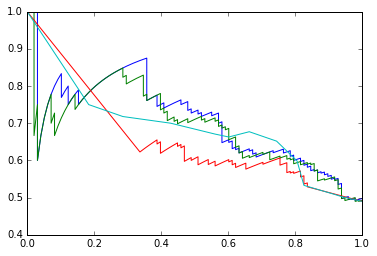

In [21]:
plt.plot(recall, precision)
plt.plot(recall_1, precision_1)
plt.plot(recall_2, precision_2)
plt.plot(recall_3, precision_3)

In [32]:
result = {'first':[],'second':[],'third':[],'forth':[]}
for i in recall:
    if recall[i] > 0.7:
        result['first'].append(precision[i])
for i in recall_1:
    if recall_1[i] > 0.7:
        result['second'].append(precision_1[i])
for i in recall_2:
    if recall_2[i] > 0.7:
        result['third'].append(precision_2[i]) 
for i in recall_3:
    if recall_3[i] > 0.7:
        result['forth'].append(precision_3[i])         

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future

In [33]:
for key in result.keys():
    print key + ' ' + str(round(max(result[key]),2))

second 0.49
forth 0.5
third 0.53
first 0.5
